In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
df = pd.read_csv('Orders_merged.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp'])

# 3. Data overview
print(df.shape)
print(df.info())
display(df.head())

# 4. Data cleaning (drop duplicates, handle missing values)
df = df.drop_duplicates()
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Fill or drop missing values as appropriate
# Example: fillna for review_score, drop rows with missing order_id
df['review_score'] = df['review_score'].fillna(df['review_score'].median())
df = df.dropna(subset=['order_id'])

# 5. Key metrics
# GMV (Gross Merchandise Value)
gmv = df['payment_value'].sum()
print(f"GMV: {gmv:,.2f}")

# Order count
order_count = df['order_id'].nunique()
print(f"Order count: {order_count}")

# Customer count
customer_count = df['customer_id'].nunique()
print(f"Customer count: {customer_count}")

# Seller count
seller_count = df['seller_id'].nunique()
print(f"Seller count: {seller_count}")

# Average order value
aov = gmv / order_count
print(f"Average Order Value: {aov:.2f}")

# Average customer spend
acs = gmv / customer_count
print(f"Average Customer Spend: {acs:.2f}")

# 6. Time-based analysis
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_gmv = df.groupby('order_month')['payment_value'].sum()
monthly_orders = df.groupby('order_month')['order_id'].nunique()

plt.figure(figsize=(12,5))
monthly_gmv.plot(marker='o')
plt.title('Monthly GMV')
plt.ylabel('GMV')
plt.xlabel('Month')
plt.show()

plt.figure(figsize=(12,5))
monthly_orders.plot(marker='o', color='orange')
plt.title('Monthly Order Count')
plt.ylabel('Orders')
plt.xlabel('Month')
plt.show()

# 7. Customer and seller distribution by state
customer_state = df['customer_state'].value_counts()
seller_state = df['seller_state'].value_counts()

plt.figure(figsize=(10,4))
customer_state.plot(kind='bar')
plt.title('Customer Distribution by State')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10,4))
seller_state.plot(kind='bar', color='green')
plt.title('Seller Distribution by State')
plt.ylabel('Number of Sellers')
plt.show()

# 8. Product category analysis
category_gmv = df.groupby('product_category_name')['payment_value'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
category_gmv.plot(kind='bar')
plt.title('Top 10 Product Categories by GMV')
plt.ylabel('GMV')
plt.show()

# 9. Review score analysis
review_score_dist = df['review_score'].value_counts().sort_index()
plt.figure(figsize=(8,4))
review_score_dist.plot(kind='bar')
plt.title('Review Score Distribution')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

# 10. Delivery analysis
df['delivery_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
plt.figure(figsize=(10,4))
sns.histplot(df['delivery_days'].dropna(), bins=30, kde=True)
plt.title('Delivery Days Distribution')
plt.xlabel('Days')
plt.show()

# 11. Payment type analysis
payment_type_dist = df['payment_type'].value_counts()
plt.figure(figsize=(8,4))
payment_type_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Type Distribution')
plt.ylabel('')
plt.show()

(96478, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96478 entries, 0 to 96477
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   product_id                     96478 non-null  object        
 1   seller_id                      96478 non-null  object        
 2   order_id                       96478 non-null  object        
 3   customer_id                    96478 non-null  object        
 4   order_status                   96478 non-null  object        
 5   order_purchase_timestamp       96478 non-null  datetime64[ns]
 6   order_approved_at              96464 non-null  datetime64[ns]
 7   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 8   order_delivered_customer_date  96470 non-null  datetime64[ns]
 9   order_estimated_delivery_date  96478 non-null  datetime64[ns]
 10  customer_unique_id             96478 non-null  object        
 11  cus

,product_id,seller_id,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,f30149f4a8882a08895b6a242aa0d612,86c180c33f454b35e1596a99da3dddc4,delivered,2018-05-20 18:45:00,2018-05-20 18:58:59,2018-05-21 16:09:00,2018-06-06 22:11:00,2018-06-20,...,sao paulo,SP,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,f5eda0ded77c1293b04c953138c8331d,68f2b37558e27791155db34bcded5ac0,delivered,2017-12-12 19:20:00,2017-12-12 19:32:19,2017-12-20 20:12:42,2017-12-23 17:11:00,2018-01-05,...,penapolis,SP,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,0bf736fd0fd5169d60de3699fcbcf986,6cd217b674e22cf568f6a2cf6060fd07,delivered,2017-12-21 16:21:00,2017-12-22 17:31:27,2018-01-02 22:27:47,2018-01-06 15:03:00,2018-01-16,...,ibitinga,SP,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,6f0dfb5b5398b271cc6bbd9ee263530e,8517e7c86998bf39a540087da6f115d9,delivered,2018-08-01 22:00:00,2018-08-01 22:15:19,2018-08-02 14:20:00,2018-08-07 17:38:00,2018-08-24,...,francisco beltrao,PR,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,3aba44d8e554ab4bb8c09f6f78032ca8,82b838f513e00463174cc7cae7e76c1f,delivered,2018-08-10 13:24:00,2018-08-10 13:35:21,2018-08-13 14:43:00,2018-08-17 21:33:00,2018-08-27,...,francisco beltrao,PR,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0


Missing values:
 product_id                           0
seller_id                            0
order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date         2
order_delivered_customer_date        8
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             85171
review_comment_message           56926
review_creation_date                 0
review_answer_timestamp              0
payment_sequential                   1
payment_type                         1
payment_installments                 1
payment_value                        1
order_item_id                        0
price   

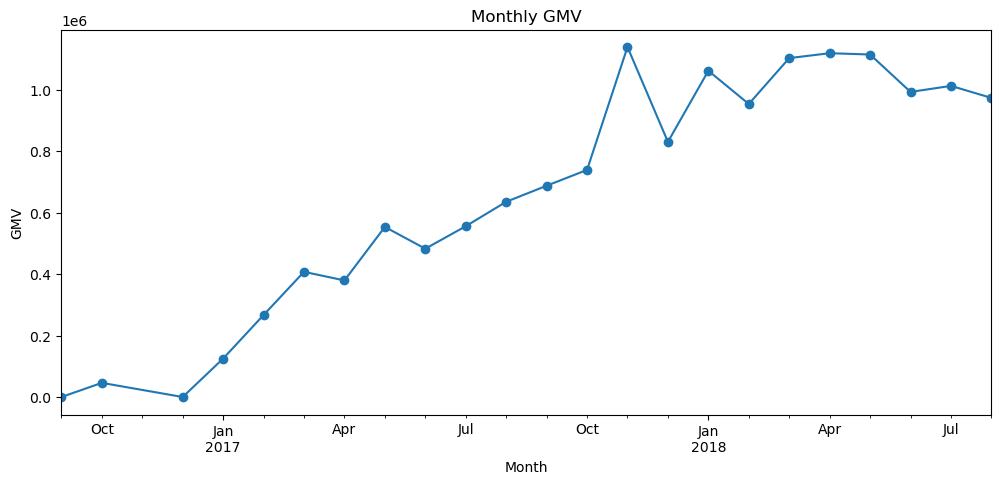

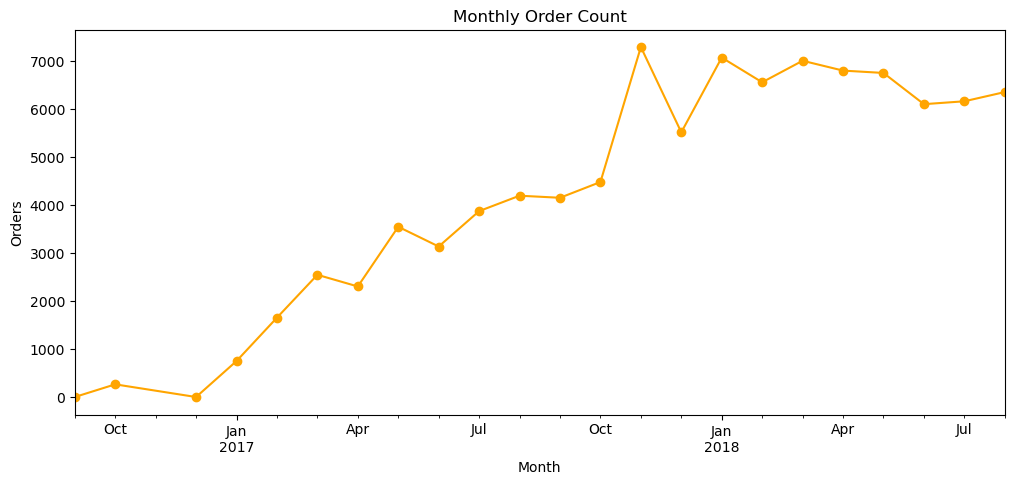

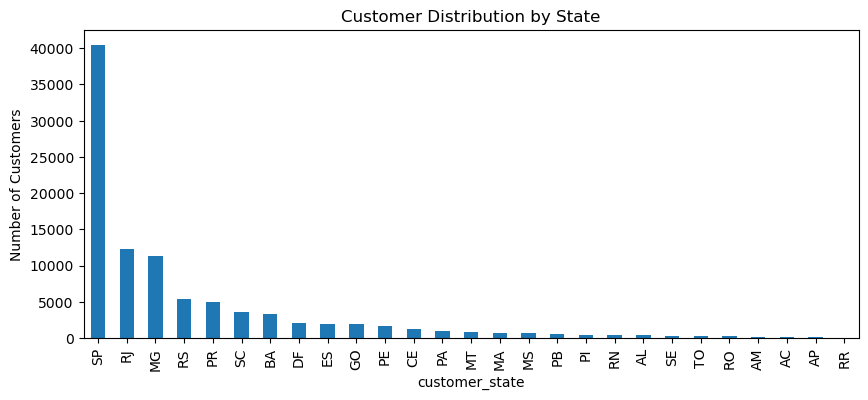

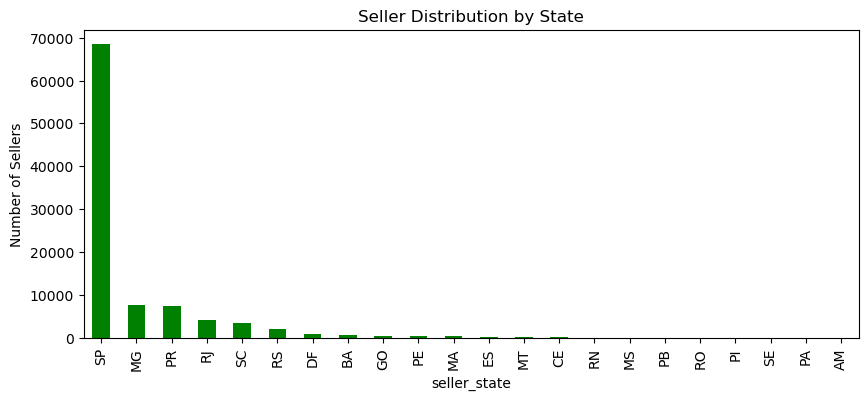

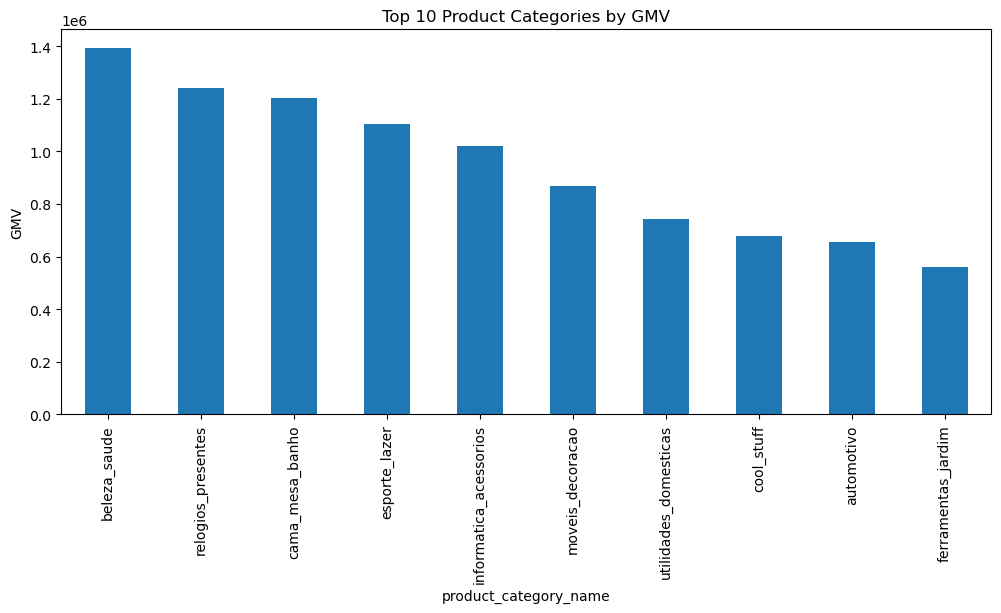

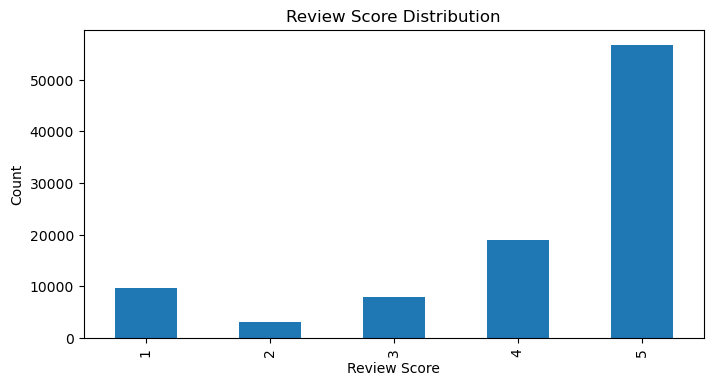

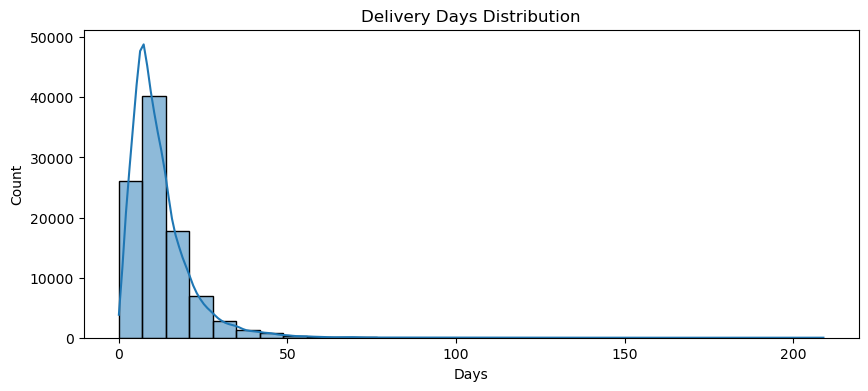

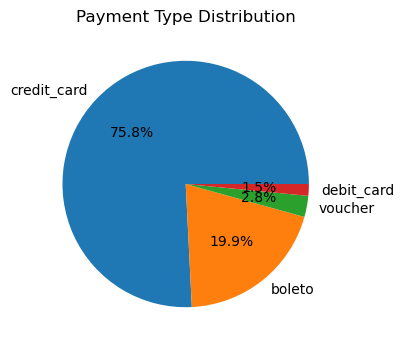